In [19]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from bs4 import BeautifulSoup
import requests

In [20]:
fulldf=pd.read_csv('cleanedFulldf.csv', index_col=0)
fulldf['dateutc'] = fulldf['dateutc'].astype('datetime64')
fulldf = fulldf.drop('dateutcindateform', 1)

In [ ]:
fulldf[fulldf]

In [182]:
regdf = fulldf

# Examine Plots to Determine if Transformations are Needed

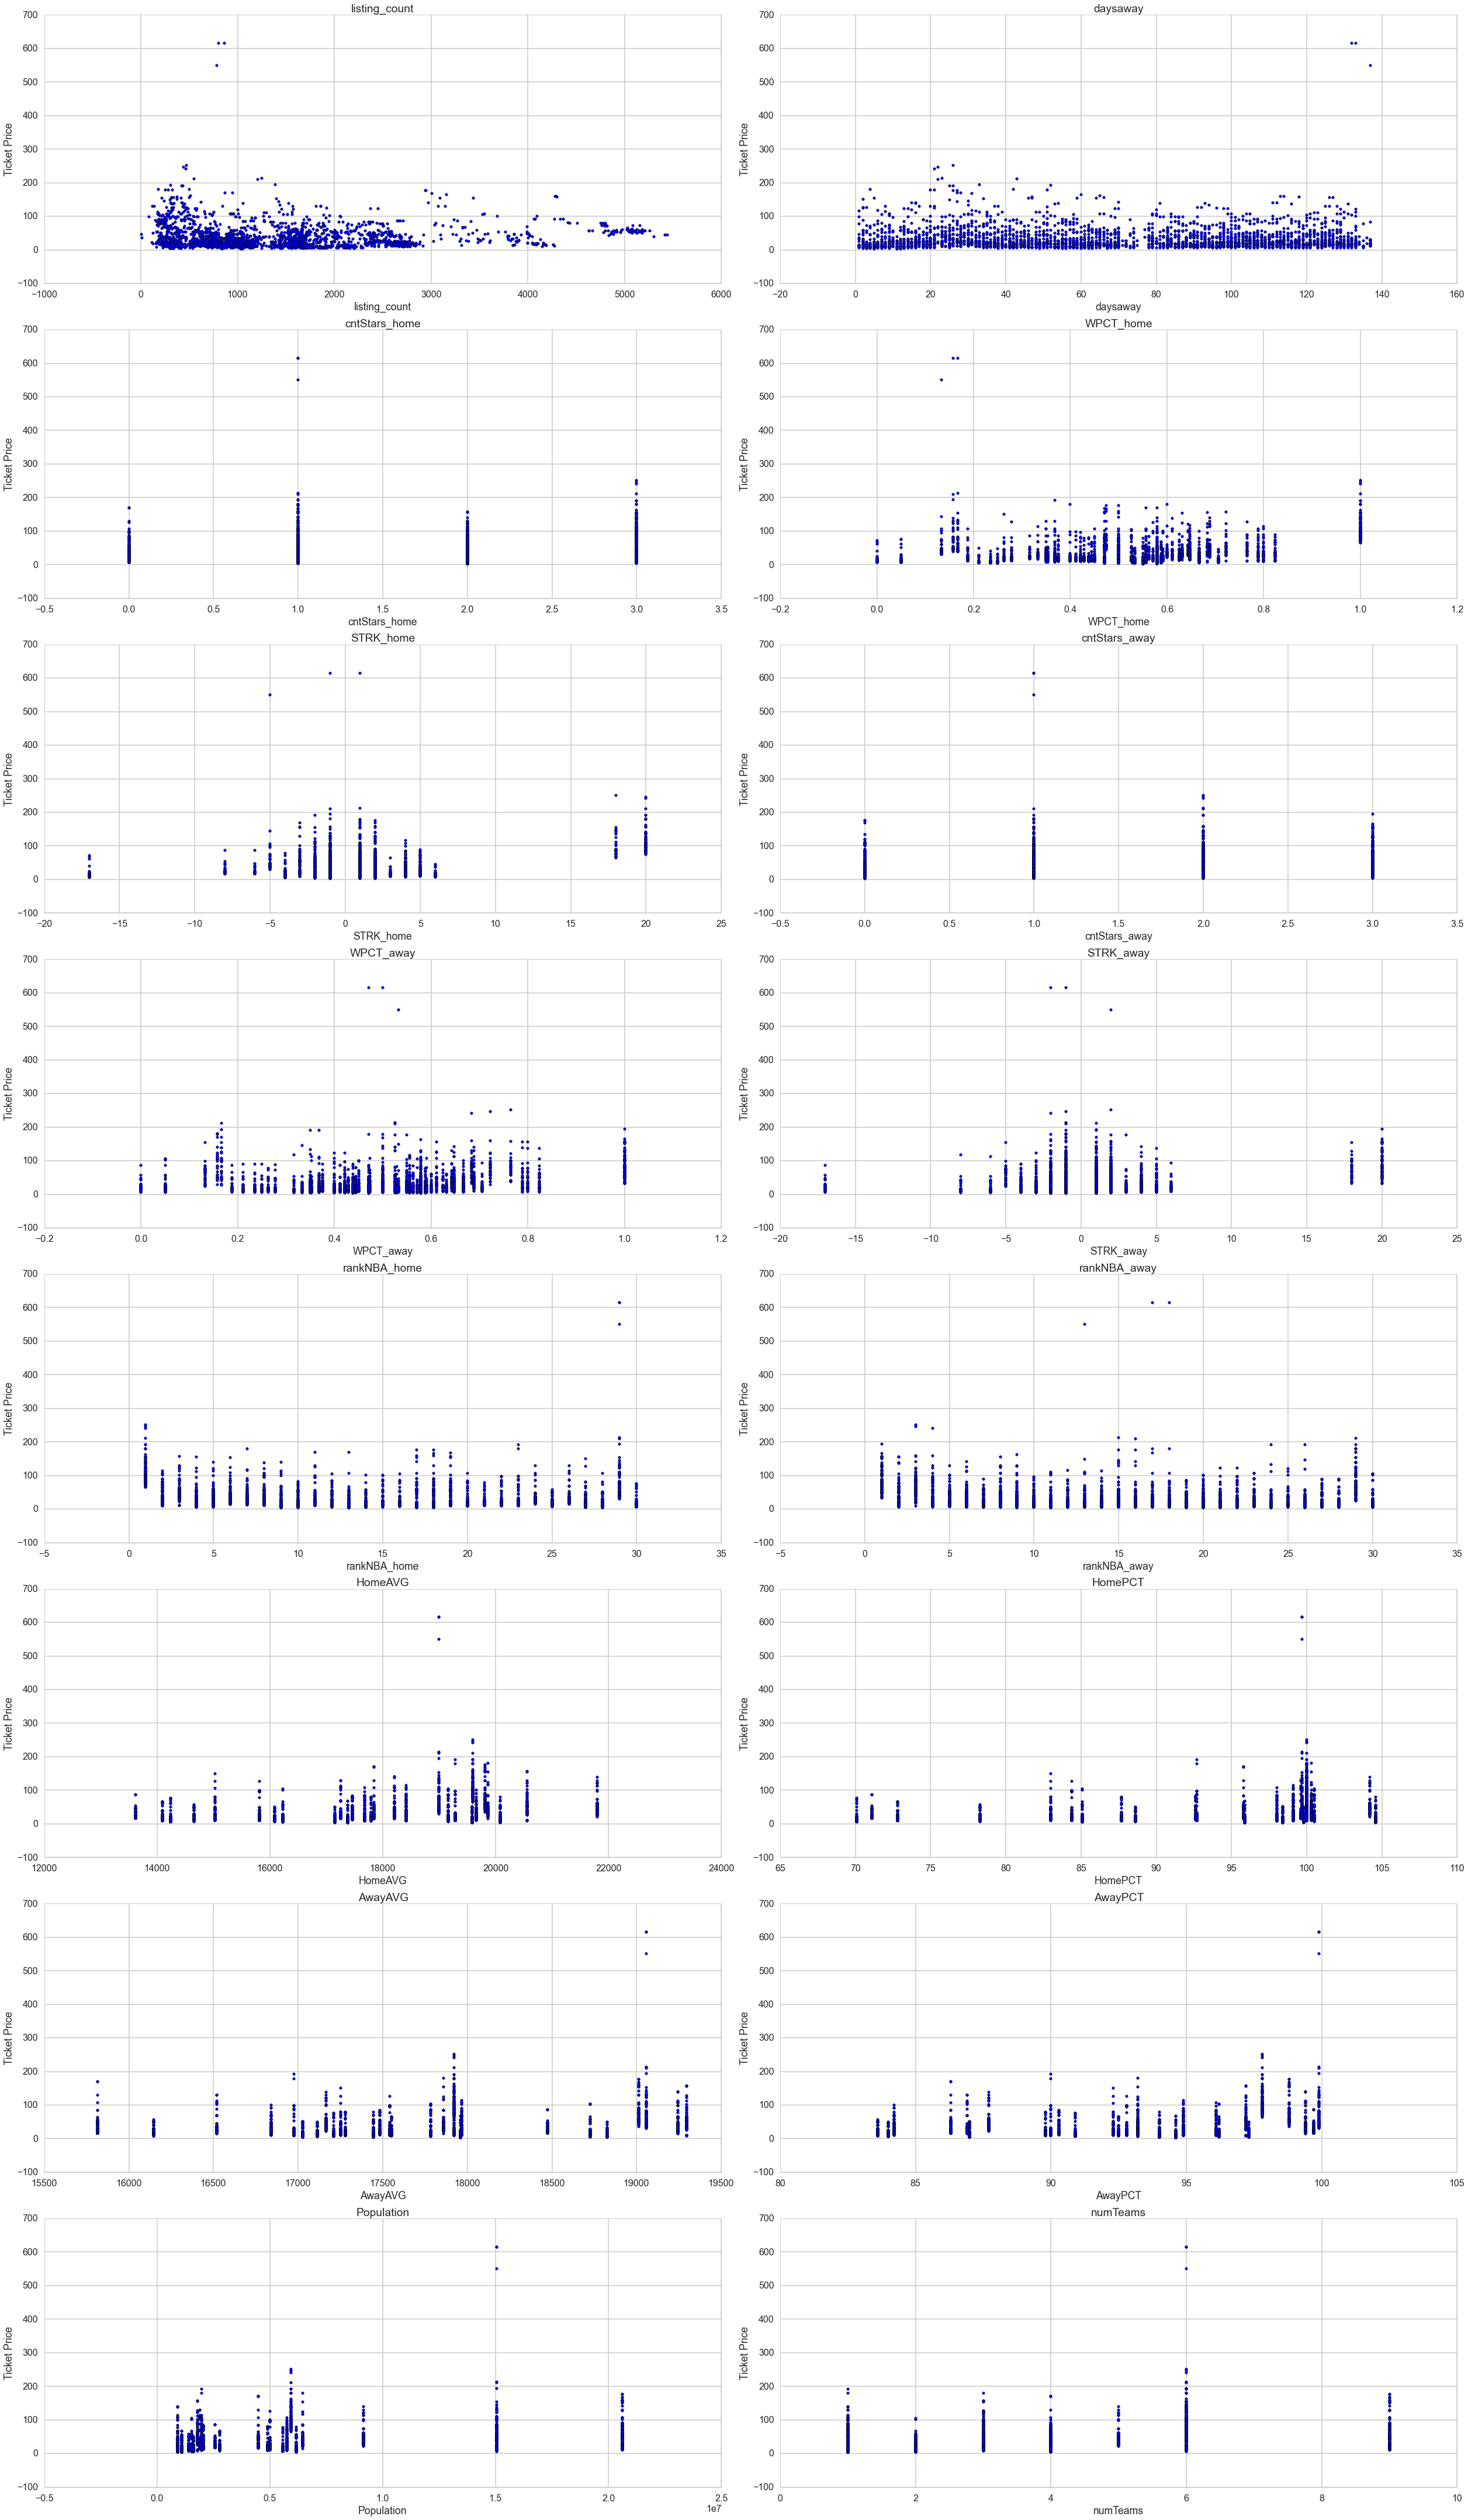

In [183]:
xvarsols = ['listing_count',
 'venuename',
 'daysaway',
 'cntStars_home',
 'WPCT_home',
 'STRK_home',
 'cntStars_away',
 'WPCT_away',
 'STRK_away',
 'rankNBA_home',
 'rankNBA_away',            
 'HomeAVG',
 'HomePCT',
 'AwayAVG',
 'AwayPCT',
 'Population',
 'numTeams',
 'holiday',
 'weekday']

continuous = ['listing_count',
 'daysaway',
 'cntStars_home',
 'WPCT_home',
 'STRK_home',
 'cntStars_away',
 'WPCT_away',
 'STRK_away',
 'rankNBA_home',
 'rankNBA_away',
 'HomeAVG',
 'HomePCT',
 'AwayAVG',
 'AwayPCT',
 'Population',
 'numTeams',
 'holiday']


fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(35, 60), tight_layout=True)
for ax, xvar in zip(axes.ravel(), continuous):
    ax.scatter(regdf[xvar], regdf["lowest_price"])
    ax.set_title(xvar)
    ax.set_xlabel(xvar)
    ax.set_ylabel('Ticket Price')

They also seem to have a polynomial relationship, so we allow for x^2.

In [184]:
regdf["STRK_away_sq"] = regdf["STRK_away"] ** 2
regdf["STRK_home_sq"] = regdf["STRK_home"] ** 2

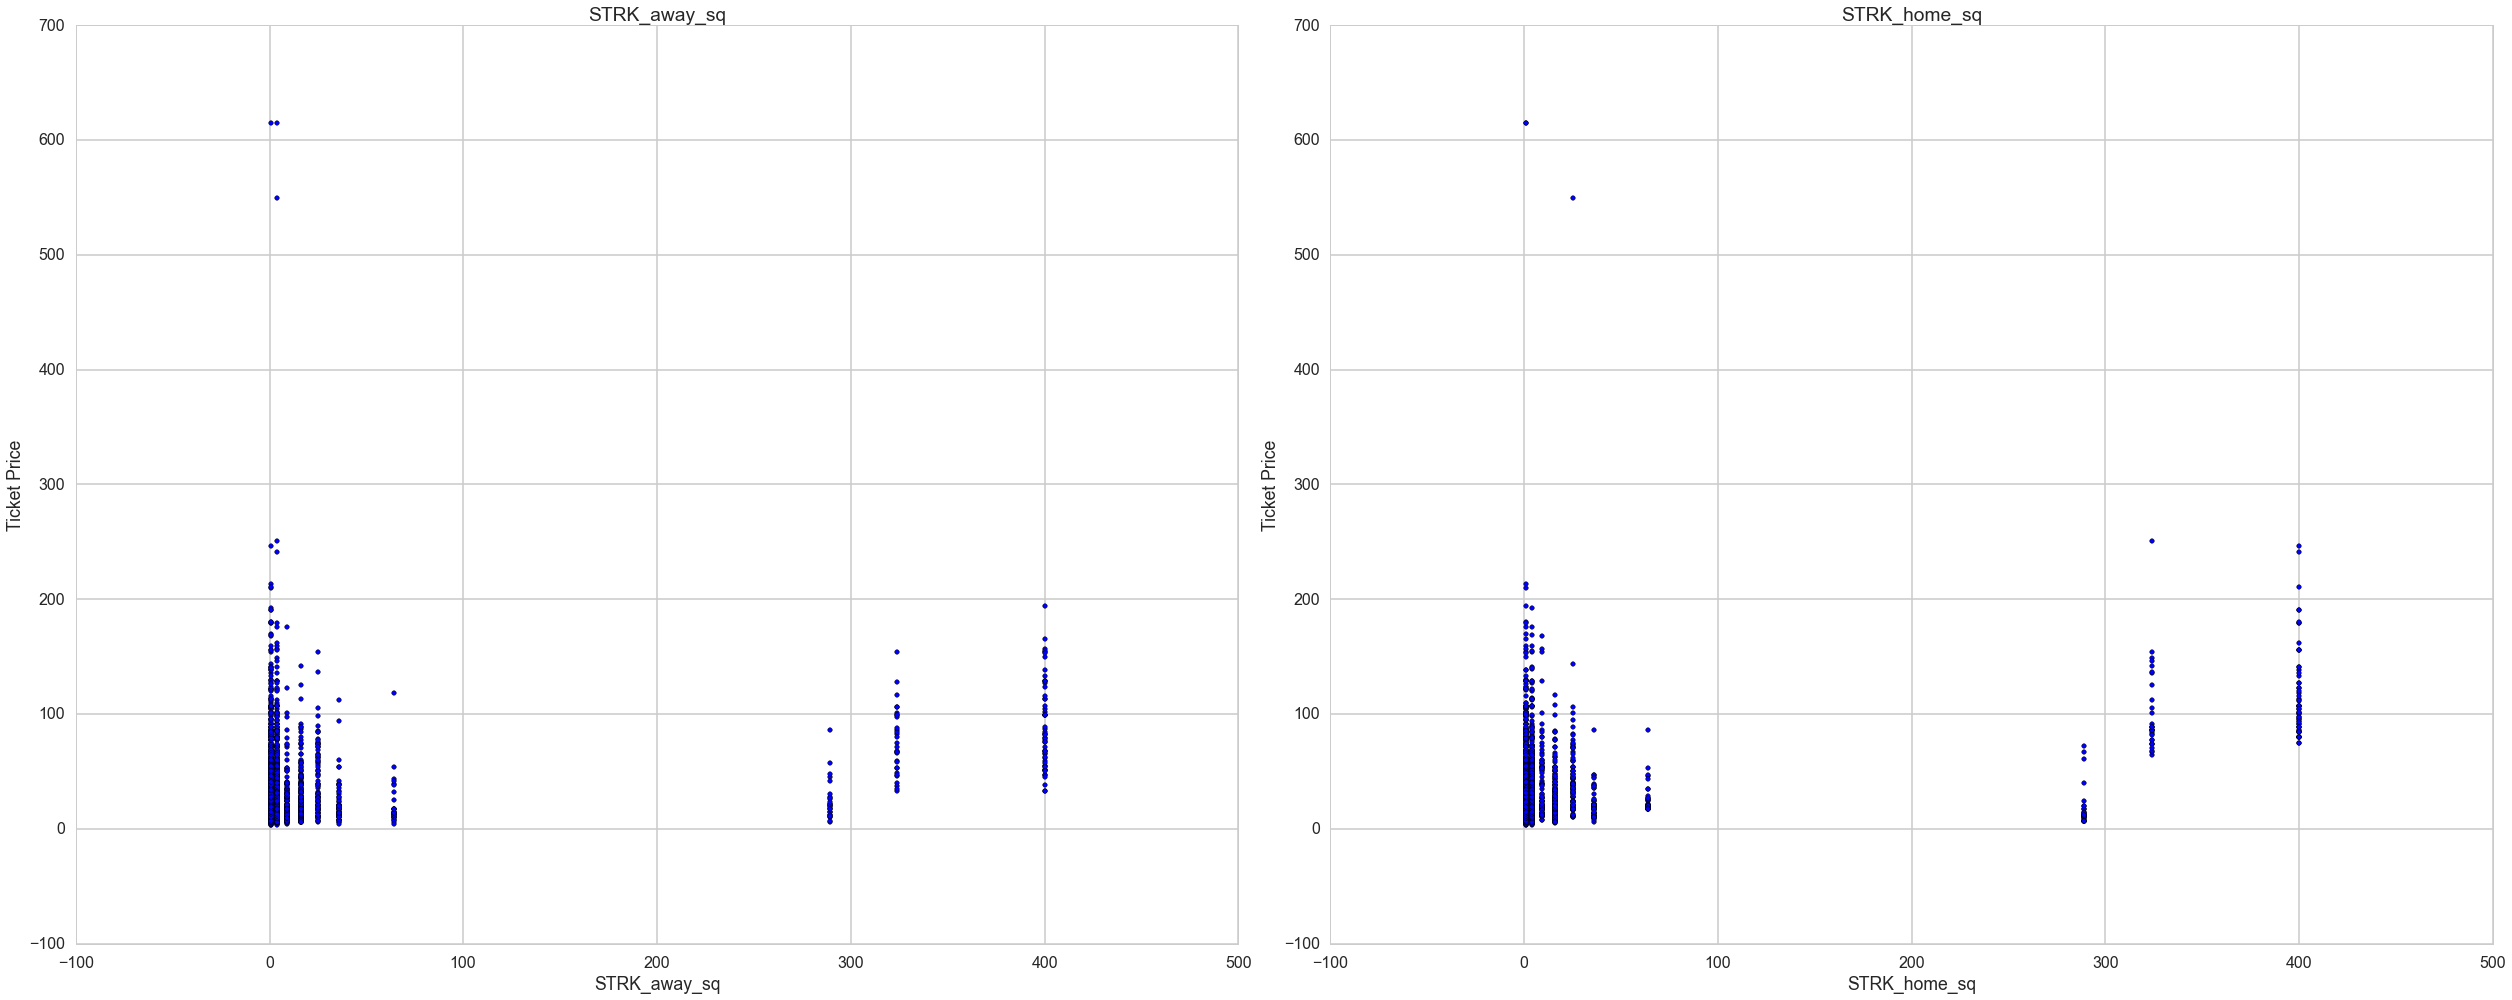

In [185]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(35, 14), tight_layout=True)
for ax, xvar in zip(axes.ravel(), ["STRK_away_sq", "STRK_home_sq"]):
    ax.scatter(regdf[xvar], regdf["lowest_price"])
    ax.set_title(xvar)
    ax.set_xlabel(xvar)
    ax.set_ylabel('Ticket Price')

In [186]:
xvarsols = ['listing_count',
 'venuename',
 'daysaway',
 'cntStars_home',
 'WPCT_home',
 'STRK_home',            
 'STRK_home_sq',
 'cntStars_away',
 'WPCT_away',
 'STRK_away',            
 'STRK_away_sq',
 'rankNBA_home',
 'rankNBA_away',            
 'HomeAVG',
 'HomePCT',
 'AwayAVG',
 'AwayPCT',
 'Population',
 'numTeams',
 'holiday',
 'weekday']

In [187]:
xvars = ['listing_count','hometeamscore','daysaway','numTeams','Population','rankNBA_home','rankNBA_away','WPCT_home','WPCT_away','cntStars_home','cntStars_away','STRK_home','STRK_away','HomePCT','AwayPCT','listing_count:listing_count','listing_count:daysaway','listing_count:numTeams','listing_count:Population','listing_count:rankNBA_home','listing_count:rankNBA_away','listing_count:WPCT_home','listing_count:WPCT_away','listing_count:cntStars_home','listing_count:cntStars_away','listing_count:STRK_home','listing_count:STRK_away','listing_count:HomePCT','listing_count:AwayPCT','venuescore:venuescore','venuescore:ticket_score','venuescore:hometeamscore','venuescore:awayteamscore','venuescore:daysaway','venuescore:numTeams','venuescore:Population','venuescore:rankNBA_home','venuescore:rankNBA_away','venuescore:WPCT_home','venuescore:WPCT_away','venuescore:cntStars_home','venuescore:cntStars_away','venuescore:STRK_home','venuescore:STRK_away','venuescore:HomePCT','venuescore:AwayPCT','ticket_score:ticket_score','ticket_score:hometeamscore','ticket_score:awayteamscore','ticket_score:daysaway','ticket_score:numTeams','ticket_score:Population','ticket_score:rankNBA_home','ticket_score:rankNBA_away','ticket_score:WPCT_home','ticket_score:WPCT_away','ticket_score:cntStars_home','ticket_score:cntStars_away','ticket_score:STRK_home','ticket_score:STRK_away','ticket_score:HomePCT','ticket_score:AwayPCT','hometeamscore:hometeamscore','hometeamscore:awayteamscore','hometeamscore:daysaway','hometeamscore:numTeams','hometeamscore:Population','hometeamscore:rankNBA_home','hometeamscore:rankNBA_away','hometeamscore:WPCT_home','hometeamscore:WPCT_away','hometeamscore:cntStars_home','hometeamscore:cntStars_away','hometeamscore:STRK_home','hometeamscore:STRK_away','hometeamscore:HomePCT','hometeamscore:AwayPCT','awayteamscore:awayteamscore','awayteamscore:daysaway','awayteamscore:numTeams','awayteamscore:Population','awayteamscore:rankNBA_home','awayteamscore:rankNBA_away','awayteamscore:WPCT_home','awayteamscore:WPCT_away','awayteamscore:cntStars_home','awayteamscore:cntStars_away','awayteamscore:STRK_home','awayteamscore:STRK_away','awayteamscore:HomePCT','awayteamscore:AwayPCT','daysaway:daysaway','daysaway:numTeams','daysaway:Population','daysaway:rankNBA_home','daysaway:rankNBA_away','daysaway:WPCT_home','daysaway:WPCT_away','daysaway:cntStars_home','daysaway:cntStars_away','daysaway:STRK_home','daysaway:STRK_away','daysaway:HomePCT','daysaway:AwayPCT','numTeams:numTeams','numTeams:Population','numTeams:rankNBA_home','numTeams:rankNBA_away','numTeams:WPCT_home','numTeams:WPCT_away','numTeams:cntStars_home','numTeams:cntStars_away','numTeams:STRK_home','numTeams:STRK_away','numTeams:HomePCT','numTeams:AwayPCT','Population:Population','Population:rankNBA_home','Population:rankNBA_away','Population:WPCT_home','Population:WPCT_away','Population:cntStars_home','Population:cntStars_away','Population:STRK_home','Population:STRK_away','Population:HomePCT','Population:AwayPCT','rankNBA_home:rankNBA_home','rankNBA_home:rankNBA_away','rankNBA_home:WPCT_home','rankNBA_home:WPCT_away','rankNBA_home:cntStars_home','rankNBA_home:cntStars_away','rankNBA_home:STRK_home','rankNBA_home:STRK_away','rankNBA_home:HomePCT','rankNBA_home:AwayPCT','rankNBA_away:rankNBA_away','rankNBA_away:WPCT_home','rankNBA_away:WPCT_away','rankNBA_away:cntStars_home','rankNBA_away:cntStars_away','rankNBA_away:STRK_home','rankNBA_away:STRK_away','rankNBA_away:HomePCT','rankNBA_away:AwayPCT','WPCT_home:WPCT_home','WPCT_home:WPCT_away','WPCT_home:cntStars_home','WPCT_home:cntStars_away','WPCT_home:STRK_home','WPCT_home:STRK_away','WPCT_home:HomePCT','WPCT_home:AwayPCT','WPCT_away:WPCT_away','WPCT_away:cntStars_home','WPCT_away:cntStars_away','WPCT_away:STRK_home','WPCT_away:STRK_away','WPCT_away:HomePCT','WPCT_away:AwayPCT','cntStars_home:cntStars_home','cntStars_home:cntStars_away','cntStars_home:STRK_home','cntStars_home:STRK_away','cntStars_home:HomePCT','cntStars_home:AwayPCT','cntStars_away:cntStars_away','cntStars_away:STRK_home','cntStars_away:STRK_away','cntStars_away:HomePCT','cntStars_away:AwayPCT','STRK_home:STRK_home','STRK_home:STRK_away','STRK_home:HomePCT','STRK_home:AwayPCT','STRK_away:STRK_away','STRK_away:HomePCT','STRK_away:AwayPCT','HomePCT:HomePCT','HomePCT:AwayPCT','AwayPCT:AwayPCT']

In [188]:
# make interaction terms
for xvar in xvars:
    if xvar.find(":") != -1:
        var1,var2 = xvar.split(":")
        regdf[xvar] = regdf[var1]*regdf[var2]

In [189]:
regdf.head()

,listing_count,avg_price,lowest_price_good,lowest_price,highest_price,city,venuename,venuescore,ticket_score,id,home_team,away_team,hometeamscore,awayteamscore,dateutc,daysaway,dateloaded,City,cntStars_home,WPCT_home,STRK_home,rankNBA_home,cntStars_away,WPCT_away,STRK_away,rankNBA_away,HomeAVG,HomePCT,AwayAVG,AwayPCT,TotalAVG,TotalPCT,Population,numTeams,holiday,weekday,dateutcindateform,STRK_away_sq,STRK_home_sq,listing_count:listing_count,listing_count:venuescore,listing_count:ticket_score,listing_count:hometeamscore,listing_count:awayteamscore,listing_count:daysaway,listing_count:numTeams,listing_count:Population,listing_count:rankNBA_home,listing_count:rankNBA_away,listing_count:WPCT_home,...,rankNBA_home:cntStars_away,rankNBA_home:STRK_home,rankNBA_home:STRK_away,rankNBA_home:HomePCT,rankNBA_home:AwayPCT,rankNBA_away:rankNBA_away,rankNBA_away:WPCT_home,rankNBA_away:WPCT_away,rankNBA_away:cntStars_home,rankNBA_away:cntStars_away,rankNBA_away:STRK_home,rankNBA_away:STRK_away,rankNBA_away:HomePCT,rankNBA_away:AwayPCT,WPCT_home:WPCT_home,WPCT_home:WPCT_away,WPCT_home:cntStars_home,WPCT_home:cntStars_away,WPCT_home:STRK_home,WPCT_home:STRK_away,WPCT_home:HomePCT,WPCT_home:AwayPCT,WPCT_away:WPCT_away,WPCT_away:cntStars_home,WPCT_away:cntStars_away,WPCT_away:STRK_home,WPCT_away:STRK_away,WPCT_away:HomePCT,WPCT_away:AwayPCT,cntStars_home:cntStars_home,cntStars_home:cntStars_away,cntStars_home:STRK_home,cntStars_home:STRK_away,cntStars_home:HomePCT,cntStars_home:AwayPCT,cntStars_away:cntStars_away,cntStars_away:STRK_home,cntStars_away:STRK_away,cntStars_away:HomePCT,cntStars_away:AwayPCT,STRK_home:STRK_home,STRK_home:STRK_away,STRK_home:HomePCT,STRK_home:AwayPCT,STRK_away:STRK_away,STRK_away:HomePCT,STRK_away:AwayPCT,HomePCT:HomePCT,HomePCT:AwayPCT,AwayPCT:AwayPCT
1,815,62,20,20,1800,Miami,American Airlines Arena,0.85776,0.78884,2759732,Miami Heat,Boston Celtics,0.78556,0.74908,2015-12-01,2,2015-11-29,Miami,2,0.667,1,5,0,0.563,2,12,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Tuesday,2015-12-01,4,1,664225,699.07440,642.90460,640.23140,610.50020,1630,3260,4697660000,4075,9780,543.605,...,0,5,10,501.5,421,144,8.004,6.756,24,0,12,24,1203.6,1010.4,0.444889,0.375521,1.334,0.000,0.667,1.334,66.9001,56.1614,0.316969,1.126,0.000,0.563,1.126,56.4689,47.4046,4,0,2,4,200.6,168.4,0,0,0,0.0,0.0,1,2,100.3,84.2,4,200.6,168.4,10060.09,8445.26,7089.64
4,3431,146,49,49,6505,Miami,American Airlines Arena,0.85776,0.84152,2759651,Miami Heat,Brooklyn Nets,0.78556,0.75524,2015-12-29,30,2015-11-29,Miami,2,0.667,1,5,3,0.188,-2,28,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Tuesday,2015-12-29,4,1,11771761,2942.97456,2887.25512,2695.25636,2591.22844,102930,13724,19776284000,17155,96068,2288.477,...,15,5,-10,501.5,421,784,18.676,5.264,56,84,28,-56,2808.4,2357.6,0.444889,0.125396,1.334,2.001,0.667,-1.334,66.9001,56.1614,0.035344,0.376,0.564,0.188,-0.376,18.8564,15.8296,4,6,2,-4,200.6,168.4,9,3,-6,300.9,252.6,1,-2,100.3,84.2,4,-200.6,-168.4,10060.09,8445.26,7089.64
5,4093,76,18,18,4435,Miami,American Airlines Arena,0.85776,0.82779,2759635,Miami Heat,Brooklyn Nets,0.78556,0.75524,2016-03-28,120,2015-11-29,Miami,2,0.667,1,5,3,0.188,-2,28,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Monday,2016-03-28,4,1,16752649,3510.81168,3388.14447,3215.29708,3091.19732,491160,16372,23592052000,20465,114604,2730.031,...,15,5,-10,501.5,421,784,18.676,5.264,56,84,28,-56,2808.4,2357.6,0.444889,0.125396,1.334,2.001,0.667,-1.334,66.9001,56.1614,0.035344,0.376,0.564,0.188,-0.376,18.8564,15.8296,4,6,2,-4,200.6,168.4,9,3,-6,300.9,252.6,1,-2,100.3,84.2,4,-200.6,-168.4,10060.09,8445.26,7089.64
7,3886,125,36,36,5914,Miami,American Airlines Arena,0.85776,0.84336,2759767,Miami Heat,New York Knicks,0.78556,0.81215,2016-01-07,39,2015-11-29,Miami,2,0.667,1,5,1,0.471,-3,19,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Thursday,2016-01-07,9,1,15100996,3333.25536,3277.29696,3052.68616,3156.01490,151554,15544,22398904000,19430,73834,2591.962,...,5,5,-15,501.5,421,361,12.673,8.949,38,19,19,-57

# First, regress today's price on various predictors that don't vary over time

**Linear Regression**

We use this and the resulting cross-validation results as a baseline. We will compare more complex and complete models below.

In [190]:
# # sample by game ID number to avoid time series considerations
# # save the training ids (just like using a seed)

# np.random.seed(seed=1)


# uniqueids = np.unique(regdf.id)
# traininglength = 500
# testinglength = len(uniqueids) - traininglength

# trainidsdf = pd.DataFrame()
# for i in range(0,99):
#     trainidsdf[i] = np.random.choice(a = uniqueids, size = traininglength, replace = False)

# trainidsdf.to_csv("trainidsdf.csv")


In [197]:
formulaols = str("lowest_price ~ ") + xvarsols[0]
count = 0
for xvarols in xvarsols:
    if count > 0:
        formulaols = formulaols + "+" + xvarols
    count = count + 1

print formulaols

lowest_price ~ listing_count+venuename+daysaway+cntStars_home+WPCT_home+STRK_home+STRK_home_sq+cntStars_away+WPCT_away+STRK_away+STRK_away_sq+rankNBA_home+rankNBA_away+HomeAVG+HomePCT+AwayAVG+AwayPCT+Population+numTeams+holiday+weekday


In [198]:
formula = str("lowest_price ~ ") + xvars[0]
count = 0
for xvar in xvars:
    if count > 0:
        formula = formula + "+" + xvar
    count = count + 1

print formula

lowest_price ~ listing_count+venuescore+ticket_score+hometeamscore+awayteamscore+daysaway+numTeams+Population+rankNBA_home+rankNBA_away+WPCT_home+WPCT_away+cntStars_home+cntStars_away+STRK_home+STRK_away+HomePCT+AwayPCT+listing_count:listing_count+listing_count:venuescore+listing_count:ticket_score+listing_count:hometeamscore+listing_count:awayteamscore+listing_count:daysaway+listing_count:numTeams+listing_count:Population+listing_count:rankNBA_home+listing_count:rankNBA_away+listing_count:WPCT_home+listing_count:WPCT_away+listing_count:cntStars_home+listing_count:cntStars_away+listing_count:STRK_home+listing_count:STRK_away+listing_count:HomePCT+listing_count:AwayPCT+venuescore:venuescore+venuescore:ticket_score+venuescore:hometeamscore+venuescore:awayteamscore+venuescore:daysaway+venuescore:numTeams+venuescore:Population+venuescore:rankNBA_home+venuescore:rankNBA_away+venuescore:WPCT_home+venuescore:WPCT_away+venuescore:cntStars_home+venuescore:cntStars_away+venuescore:STRK_home+venu

In [199]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
def cv_optimize_ridge(X, y, n_folds=4):
    clf = Ridge()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [200]:
def cv_optimize_lasso(X, y, n_folds=4):
    clf = Lasso()
    parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

In [201]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols
from sklearn.linear_model import LinearRegression
import patsy
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [202]:
#100-fold crossvalidation 
trainidsdf = pd.DataFrame.from_csv("trainidsdf.csv")
uniqueids = np.unique(regdf.id)

olsmses = []
olsmads = []
ridgemses = []
ridgemads = []
lassomses = []
lassomads = []
count = 0
for i in trainidsdf.columns.values[0]:
    trainids = trainidsdf[i]
    testids = set(uniqueids) - set(trainids)
    
    traindf = regdf.loc[regdf["id"].isin(trainids)]
    testdf = regdf.loc[regdf["id"].isin(testids)]
    
    forfitols = pd.DataFrame(traindf.lowest_price)
    forpredols = pd.DataFrame(testdf.lowest_price)
    for xvar in xvarsols:
        forpredols[xvar] = testdf[xvar]
        forfitols[xvar] = traindf[xvar]
    ytrainols,xtrainols = patsy.dmatrices(formula, data=forfitols)
    ytestols,xtestols = patsy.dmatrices(formula, data=forpredols)

    forfit = pd.DataFrame(traindf.lowest_price)
    forpred = pd.DataFrame(testdf.lowest_price)
    for xvar in xvars:
        forpred[xvar] = testdf[xvar]
        forfit[xvar] = traindf[xvar]
    ytrain,xtrain = patsy.dmatrices(formula, data=forfit)
    ytest,xtest = patsy.dmatrices(formula, data=forpred)
        
    # linear
    lm = LinearRegression()
    fit = lm.fit(xtrainols, ytrainols)
    pred = lm.predict(xtestols)
    olsmses.append(np.mean((ytestols - pred) ** 2))
    olsmads.append(np.mean(abs(ytestols - pred)))
    
    # ridge
    fitridge = cv_optimize_ridge(xtrain, ytrain, n_folds=4)
    alpharidge = fitridge.best_params_['alpha']
    clfridge = Ridge(alpha=alpharidge).fit(xtrain,ytrain)
    ridgemses.append(np.mean((clfridge.predict(xtest) - ytest) ** 2))
    ridgemads.append(np.mean(abs(clfridge.predict(xtest) - ytest))) 
    
    # lasso
    fitlasso = cv_optimize_lasso(xtrain, ytrain, n_folds=4)
    alphalasso = fitlasso.best_params_['alpha']
    clflasso = Lasso(alpha=alphalasso).fit(xtrain,ytrain)
    lassomses.append(np.mean((clflasso.predict(xtest) - ytest) ** 2))
    lassomads.append(np.mean(abs(clflasso.predict(xtest) - ytest))) 
    
    count = count + 1
    
# sources: http://stackoverflow.com/questions/2104305/finding-elements-not-in-a-list, http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas, http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html, http://stackoverflow.com/questions/20724919/pandas-dataframe-attributeerror-dataframe-object-has-no-attribute-design-inf

NameError: name 'hometeamscore' is not defined

In [ ]:
print olsmses
print ridgemses
print lassomses

In [196]:
print olsmads
print ridgemads
print lassomads

[]
[]
[]


We want to explore other functional forms for daysaway, as the linear form is not necessarily best. We inlude several orders of a polynomial and use Ridge and Lasso Regression to produce the best set of predictors.
We also want to include interaction terms. This produces a massive number of predictors, which Ridge and Lasso Regression will help with.

In [12]:
fulldf.head(2)

,listing_count,avg_price,lowest_price_good,lowest_price,highest_price,city,venuename,venuescore,ticket_score,id,home_team,away_team,hometeamscore,awayteamscore,dateutc,daysaway,dateloaded,City,cntStars_home,WPCT_home,STRK_home,rankNBA_home,cntStars_away,WPCT_away,STRK_away,rankNBA_away,HomeAVG,HomePCT,AwayAVG,AwayPCT,TotalAVG,TotalPCT,Population,numTeams,holiday,weekday
1,815,62,20,20,1800,Miami,American Airlines Arena,0.85776,0.78884,2759732,Miami Heat,Boston Celtics,0.78556,0.74908,2015-12-01,2,2015-11-29,Miami,2,0.667,1,5,0,0.563,2,12,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Tuesday
4,3431,146,49,49,6505,Miami,American Airlines Arena,0.85776,0.84152,2759651,Miami Heat,Brooklyn Nets,0.78556,0.75524,2015-12-29,30,2015-11-29,Miami,2,0.667,1,5,3,0.188,-2,28,19659,100.3,16840,84.2,18720,94.9,5764000,4,0,Tuesday


# Second, regress the price in a week on various predictors

In [54]:
# df=pd.read_csv('weekFulldf.csv', index_col=0)
# df['dateutc'] = df['dateutc'].astype('datetime64')
# df = df.drop('dateutcindateform', 1)

data1129=fulldf[fulldf['dateloaded']=='2015-11-29']
data1206=fulldf[fulldf['dateloaded']=='2015-12-06']




In [62]:
# data1129.join(data1206, on='id', how='left')
pd.merge(data1129, data1206, how='inner', left_on=True)

TypeError: object of type 'NoneType' has no len()

**Linear Regression**

**Ridge Regression**

**Lasso Regression**